# Python Fundamentals — Fully **Guided** Before → Action → After

**Purpose (10–15 min warm-up):** See each change immediately and understand *why* we do it.  
No open tasks. Every step is runnable as-is. Two tunable parameters are provided for optional tweaking.

## Parameters you can tweak (optional)

In [10]:
# You can change these two numbers and re-run the whole notebook (Runtime → Run all)
ACCEPTABLE_THRESHOLD_DAYS = 2   # lateness threshold for "Acceptable"
FUEL_SURCHARGE_RATE = 0.07      # 7% surcharge
print("Using ACCEPTABLE_THRESHOLD_DAYS =", ACCEPTABLE_THRESHOLD_DAYS, 
      "and FUEL_SURCHARGE_RATE =", FUEL_SURCHARGE_RATE)

Using ACCEPTABLE_THRESHOLD_DAYS = 2 and FUEL_SURCHARGE_RATE = 0.07


## 0) Imports

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6,3.5)

## 1) Create a tiny shipment table

In [12]:
# BEFORE
print("BEFORE: no DataFrame yet.")
try:
    display(df.head())
except NameError:
    print("Confirmed: df is not defined.")

# ACTION
df = pd.DataFrame({
    "Mode": ["Air","Road","Sea","Road","Air"],
    "LeadTime_days": [3,7,18,5,2],
    "SLA_days": [4,6,18,6,4],
    "Cost_EUR": [120.3,35.4,20.6,37.8,122.9]
})

# AFTER
print("\nAFTER: DataFrame created")
display(df)

BEFORE: no DataFrame yet.


,Mode,LeadTime_days,SLA_days,Cost_EUR,OnTime,LateBy_days,Performance,Rounded_Cost,Cost_With_FuelSurcharge
0,Air,3,4,122.0,True,-1,Good,120,128.40
1,Road,7,6,35.0,False,1,Acceptable,35,37.45
2,Sea,18,18,20.0,True,0,Good,20,21.40
3,Road,5,6,37.0,True,-1,Good,37,39.59
4,Air,2,4,122.0,True,-2,Good,122,130.54



AFTER: DataFrame created


,Mode,LeadTime_days,SLA_days,Cost_EUR
0,Air,3,4,120.3
1,Road,7,6,35.4
2,Sea,18,18,20.6
3,Road,5,6,37.8
4,Air,2,4,122.9


## 2) Add `OnTime` — the most basic KPI
**Logic:** A shipment is on time if `LeadTime_days ≤ SLA_days`.

In [13]:
# BEFORE
display(df[["Mode","LeadTime_days","SLA_days"]])

# ACTION
df["OnTime"] = df["LeadTime_days"] <= df["SLA_days"]

# AFTER
display(df[["Mode","LeadTime_days","SLA_days","OnTime"]])
print("OTIF (% on-time):", round(df["OnTime"].mean()*100, 1), "%")

,Mode,LeadTime_days,SLA_days
0,Air,3,4
1,Road,7,6
2,Sea,18,18
3,Road,5,6
4,Air,2,4


,Mode,LeadTime_days,SLA_days,OnTime
0,Air,3,4,True
1,Road,7,6,False
2,Sea,18,18,True
3,Road,5,6,True
4,Air,2,4,True


OTIF (% on-time): 80.0 %


## 3) Add `LateBy_days` — how late is late?
**Logic:** `LateBy_days = LeadTime_days − SLA_days`  
This gives magnitude, not just True/False.

In [14]:
# BEFORE
display(df[["Mode","LeadTime_days","SLA_days"]])

# ACTION
df["LateBy_days"] = df["LeadTime_days"] - df["SLA_days"]

# AFTER
display(df[["Mode","LeadTime_days","SLA_days","LateBy_days","OnTime"]])

,Mode,LeadTime_days,SLA_days
0,Air,3,4
1,Road,7,6
2,Sea,18,18
3,Road,5,6
4,Air,2,4


,Mode,LeadTime_days,SLA_days,LateBy_days,OnTime
0,Air,3,4,-1,True
1,Road,7,6,1,False
2,Sea,18,18,0,True
3,Road,5,6,-1,True
4,Air,2,4,-2,True


## 4) Classify performance with `.apply()` — business rule
**Rule:**  
- "Good" if OnTime  
- "Acceptable" if `LateBy_days ≤ ACCEPTABLE_THRESHOLD_DAYS` (currently **{ACCEPTABLE_THRESHOLD_DAYS}**)  
- else "Critical"

In [15]:
# BEFORE
display(df[["Mode","LeadTime_days","SLA_days","LateBy_days","OnTime"]])

# ACTION
def performance_flag(row, threshold=ACCEPTABLE_THRESHOLD_DAYS):
    if row["OnTime"]:
        return "Good"
    elif row["LateBy_days"] <= threshold:
        return "Acceptable"
    else:
        return "Critical"

df["Performance"] = df.apply(performance_flag, axis=1)

# AFTER
display(df[["Mode","LeadTime_days","SLA_days","LateBy_days","OnTime","Performance"]])
print(df["Performance"].value_counts())

,Mode,LeadTime_days,SLA_days,LateBy_days,OnTime
0,Air,3,4,-1,True
1,Road,7,6,1,False
2,Sea,18,18,0,True
3,Road,5,6,-1,True
4,Air,2,4,-2,True


,Mode,LeadTime_days,SLA_days,LateBy_days,OnTime,Performance
0,Air,3,4,-1,True,Good
1,Road,7,6,1,False,Acceptable
2,Sea,18,18,0,True,Good
3,Road,5,6,-1,True,Good
4,Air,2,4,-2,True,Good


Performance
Good          4
Acceptable    1
Name: count, dtype: int64


## 5) Clean numeric output — round cost & add surcharge
**Why:** Reports prefer clean numbers and explicit assumptions (e.g., fuel surcharge).

In [16]:
# BEFORE
display(df[["Mode","Cost_EUR"]])

# ACTION
df["Rounded_Cost"] = df["Cost_EUR"].apply(lambda x: round(x, 0))
df["Cost_With_FuelSurcharge"] = (df["Cost_EUR"] * (1 + FUEL_SURCHARGE_RATE)).round(2)

# AFTER
display(df[["Mode","Cost_EUR","Rounded_Cost","Cost_With_FuelSurcharge"]])

,Mode,Cost_EUR
0,Air,120.3
1,Road,35.4
2,Sea,20.6
3,Road,37.8
4,Air,122.9


,Mode,Cost_EUR,Rounded_Cost,Cost_With_FuelSurcharge
0,Air,120.3,120.0,128.72
1,Road,35.4,35.0,37.88
2,Sea,20.6,21.0,22.04
3,Road,37.8,38.0,40.45
4,Air,122.9,123.0,131.50


## 6) Summarize by Mode — groupby + simple OTIF bar
**Why:** Quickly see performance and cost by segment.

,Mode,LeadTime_days,SLA_days,Cost_EUR,OnTime,LateBy_days,Performance,Rounded_Cost,Cost_With_FuelSurcharge
0,Air,3,4,120.3,True,-1,Good,120.0,128.72
1,Road,7,6,35.4,False,1,Acceptable,35.0,37.88
2,Sea,18,18,20.6,True,0,Good,21.0,22.04
3,Road,5,6,37.8,True,-1,Good,38.0,40.45
4,Air,2,4,122.9,True,-2,Good,123.0,131.50


Summary KPIs by Mode


,Avg_Cost,OTIF,Count
Mode,,,
Air,121.6,1.0,2
Road,36.6,0.5,2
Sea,20.6,1.0,1


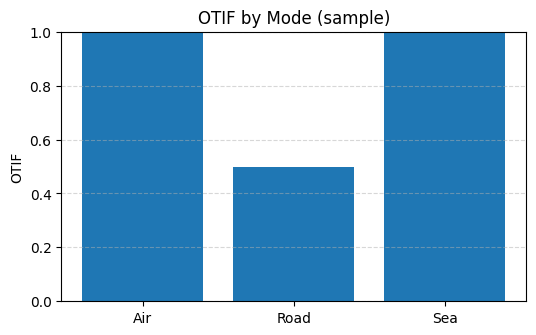

In [17]:
# BEFORE
display(df.head())

# ACTION
summary = df.groupby("Mode").agg(
    Avg_Cost=("Cost_EUR","mean"),
    OTIF=("OnTime","mean"),
    Count=("Mode","size")
).round(2)

# AFTER
print("Summary KPIs by Mode")
display(summary)

by_mode_otif = df.groupby("Mode")["OnTime"].mean()
plt.figure()
plt.bar(by_mode_otif.index, by_mode_otif.values)
plt.title("OTIF by Mode (sample)")
plt.ylabel("OTIF")
plt.ylim(0,1)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

## 7) Debug & fix a common issue — missing values
**Why:** Real files have gaps. You must detect and fix them safely.

In [18]:
# BEFORE
print("Nulls BEFORE:\n", df.isna().sum())

# ACTION (simulate an issue)
df.loc[0, "Cost_EUR"] = None

# AFTER (problem visible)
print("\nNulls AFTER introducing an issue:\n", df.isna().sum())
display(df.loc[[0], ["Mode","Cost_EUR"]])

# ACTION (fix): fill NA with mode-average cost
df["Cost_EUR"] = df["Cost_EUR"].fillna(df.groupby("Mode")["Cost_EUR"].transform("mean"))

# AFTER (fixed)
print("\nNulls AFTER fix:\n", df.isna().sum())
display(df.loc[[0], ["Mode","Cost_EUR"]])

Nulls BEFORE:
 Mode                       0
LeadTime_days              0
SLA_days                   0
Cost_EUR                   0
OnTime                     0
LateBy_days                0
Performance                0
Rounded_Cost               0
Cost_With_FuelSurcharge    0
dtype: int64

Nulls AFTER introducing an issue:
 Mode                       0
LeadTime_days              0
SLA_days                   0
Cost_EUR                   1
OnTime                     0
LateBy_days                0
Performance                0
Rounded_Cost               0
Cost_With_FuelSurcharge    0
dtype: int64


,Mode,Cost_EUR
0,Air,NaN



Nulls AFTER fix:
 Mode                       0
LeadTime_days              0
SLA_days                   0
Cost_EUR                   0
OnTime                     0
LateBy_days                0
Performance                0
Rounded_Cost               0
Cost_With_FuelSurcharge    0
dtype: int64


,Mode,Cost_EUR
0,Air,122.9


## Optional: One-cell playground
You can adjust `ACCEPTABLE_THRESHOLD_DAYS` or `FUEL_SURCHARGE_RATE` above and re-run **Runtime → Run all** to see the ripple effects.